In [19]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import math
from queue import Queue

In [20]:
def setupPlots(numberPlots=1):
    r"""Setups a figure and returns the figure and axis. 
    Receives the number of plots"""
    x = min(2, numberPlots)
    y = int((numberPlots+1)/2) 
    #_ = figure(figsize=(10*x, y*6), dpi=80)
    fig, ax = plt.subplots(y,x, squeeze=False, figsize=(10*x, y*6), dpi=80)
    ax2 = []
    it = 0
    for yy in ax:
        for xx in yy:
            if(it == numberPlots):
                break
            ax2.append(xx)
            it += 1
            

    return fig, ax2

In [21]:
def thresholdImage(img, range :tuple, value, remain = True):
    r"""Receives a single channel Image, a range, and the substitute value. Elements inside (inclusive)
    that range, gets their values replaced by the value specified.
    If remain==True, the remaining pixels conserve its value, otherwise the remaining pixels are reset 2 zero"""

    mask = np.bitwise_and(img<=range[1], img>=range[0])
    mask2 = np.bitwise_not(mask)
    if(remain == False):
        return mask*value
    else:
        return mask*value + img*mask2

In [22]:
def Dilatation(kernel, img):
    #print(img.size)
    #print(img)
    N = img.shape[0]
    M = img.shape[1]

    kN = kernel.shape[0]
    kM = kernel.shape[1]

    kernel = np.array(kernel, dtype=int)
    base = np.count_nonzero(kernel)

    ans = np.zeros(img.shape)
    for i in range(0+kN-1,N):
        for j in range(0+kM-1, M):
            #print(i, j, i-kN+1, j-kM+1, j+1, kernel.shape)
            imgKern = np.array(img[i-kN+1:i+1, j-kM+1:j+1], dtype=int)
            ##imgKern = img[0:5,0:5]
            
            #print(imgKern)
            imgCheck = imgKern + kernel
            imgCheck -= np.ones(imgKern.shape, dtype=int)*255*2
            cc = np.count_nonzero(imgCheck==0)
            if(cc > 0):
                ans[i-int(kN/2)][j-int(kM/2)] = 255
    return ans

            

In [23]:
def Erosion(kernel, img):
    #print(img.size)
    #print(img)
    N = img.shape[0]
    M = img.shape[1]

    kN = kernel.shape[0]
    kM = kernel.shape[1]

    kernel = np.array(kernel, dtype=int)
    base = np.count_nonzero(kernel)
    #print(base)
    ans = np.zeros(img.shape)
    for i in range(0+kN-1,N):
        for j in range(0+kM-1, M):
            #print(i, j, i-kN+1, j-kM+1, j+1, kernel.shape)
            imgKern = np.array(img[i-kN+1:i+1, j-kM+1:j+1], dtype=int)
            ##imgKern = img[0:5,0:5]
            
            #print(imgKern)
            #print(imgKern)
            imgCheck = imgKern + kernel
            #print(imgCheck)
            imgCheck -= np.ones(imgKern.shape, dtype=int)*255*2
            cc = np.count_nonzero(imgCheck==0)
            #print(imgCheck)
            #return ans
            if(base == cc):
                ans[i-int(kN/2)][j-int(kM/2)] = 255
    return ans

            

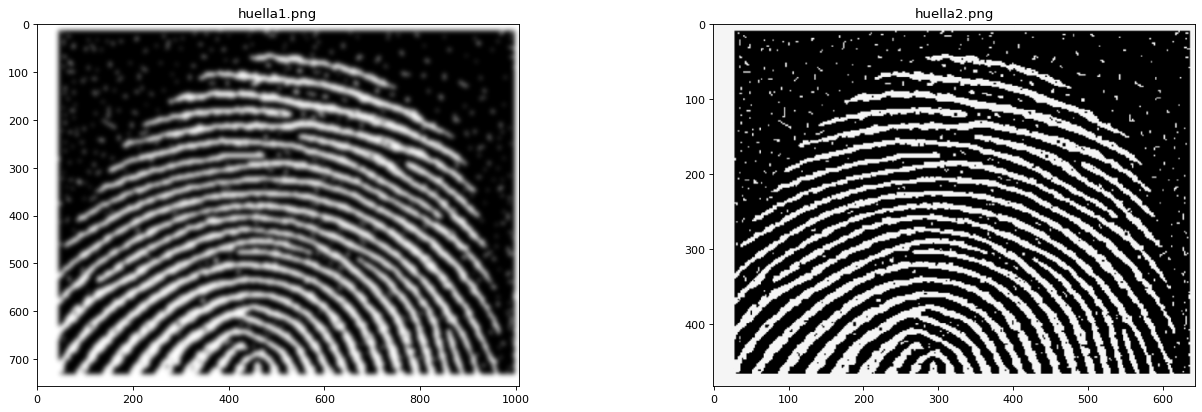

In [24]:
imgNames = ['huella1.png', 'huella2.png']
imgPath = '../dataset/'
imgs = []
N = len(imgNames)
for imgName in imgNames:
    imgBGR = cv2.imread(imgPath + imgName)
    imgBW = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2GRAY)
    imgs.append(imgBW)
fig, ax = setupPlots(N)
for axes, img, name in zip(ax, imgs, imgNames):
    axes.imshow(img, cmap = 'gray')
    axes.set_title(name)

#### Convert image into binary image (only 0, and 255)

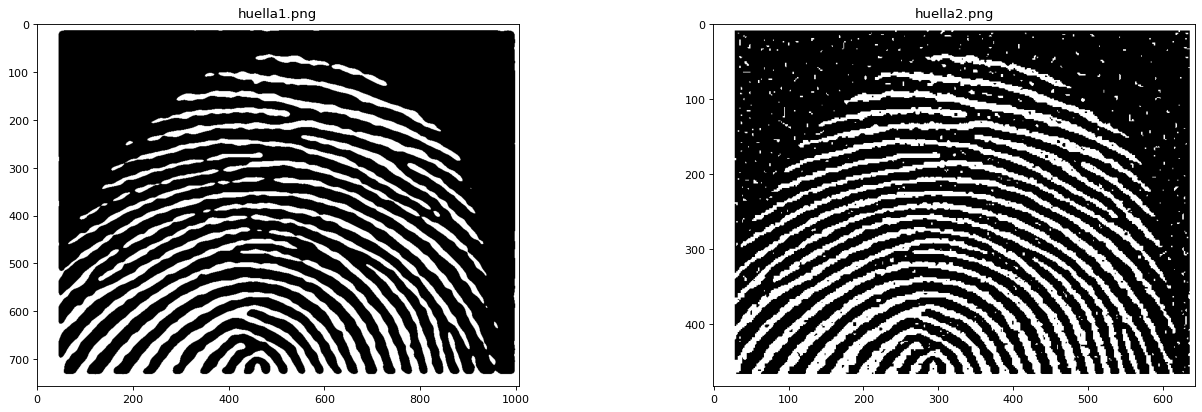

In [25]:
imgs2 = []
for img in imgs:
    imgs2.append(thresholdImage(img, (123,255), 255, remain=False))

imgs = imgs2
fig, ax = setupPlots(N)
for axes, img, name in zip(ax, imgs, imgNames):
    axes.imshow(img, cmap = 'gray')
    axes.set_title(name)

#print(imgs[0])

#### Morphological operations on image 2.... huella2.png

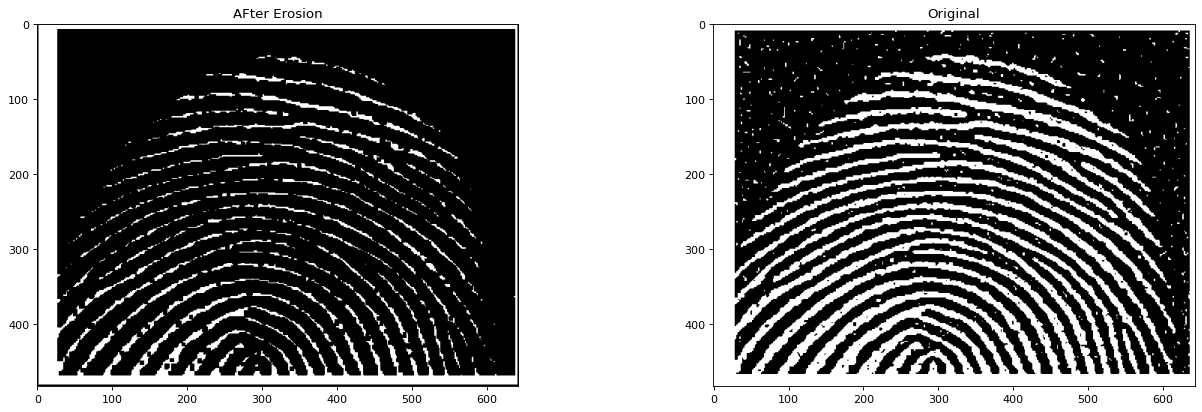

In [26]:
fig, ax = setupPlots(2)
prueba1 = Erosion(np.ones((5,5))*255, imgs[1])
#print(prueba1)
ax[0].imshow(prueba1, cmap='gray')
ax[0].set_title('AFter Erosion')
ax[1].imshow(imgs[1], cmap='gray')
ax[1].set_title('Original')
plt.show()

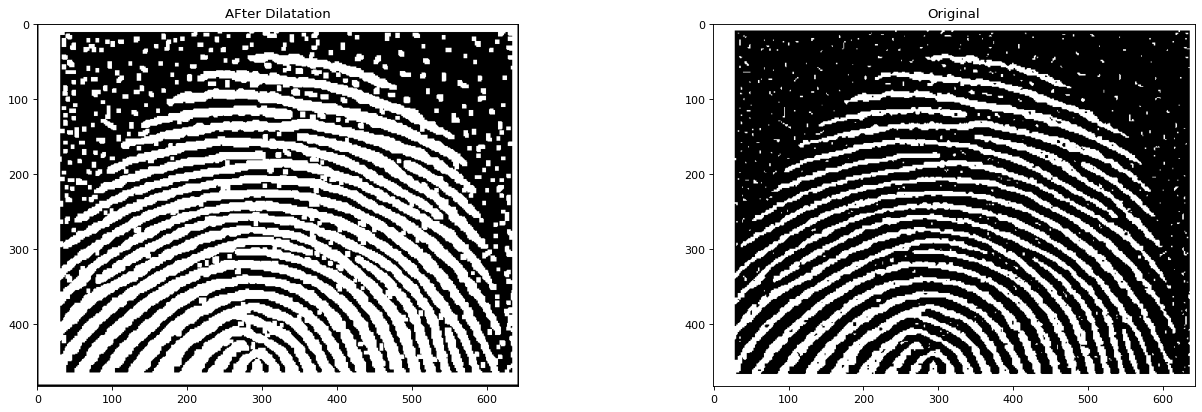

In [27]:
fig, ax = setupPlots(2)
prueba1 = Dilatation(np.ones((5,5))*255, imgs[1])
ax[0].imshow(prueba1, cmap='gray')
ax[0].set_title('AFter Dilatation')
ax[1].imshow(imgs[1], cmap='gray')
ax[1].set_title('Original')
plt.show()

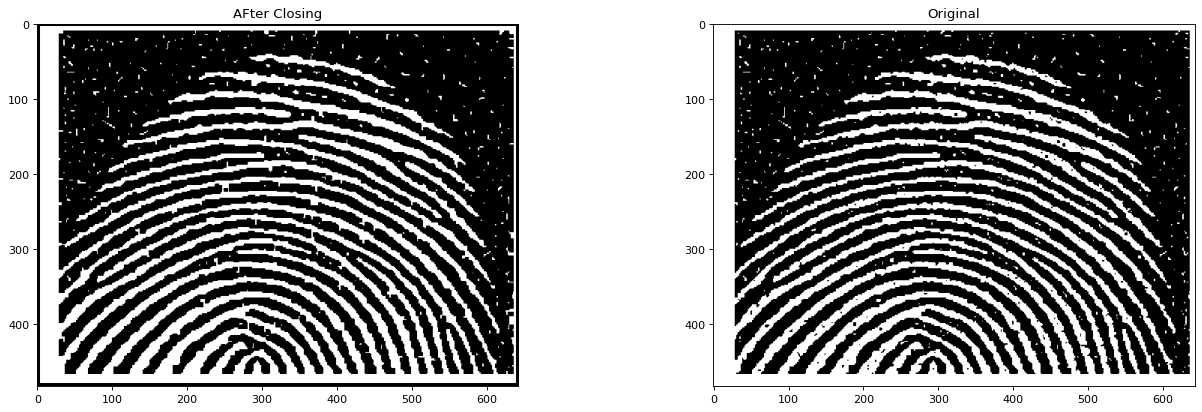

In [28]:
fig, ax = setupPlots(2)
kernel = np.ones((5,5))*255
prueba1 = Erosion(kernel, Dilatation(kernel, imgs[1])) # closing
ax[0].imshow(prueba1, cmap='gray')
ax[0].set_title('AFter Closing')
ax[1].imshow(imgs[1], cmap='gray')
ax[1].set_title('Original')
plt.show()

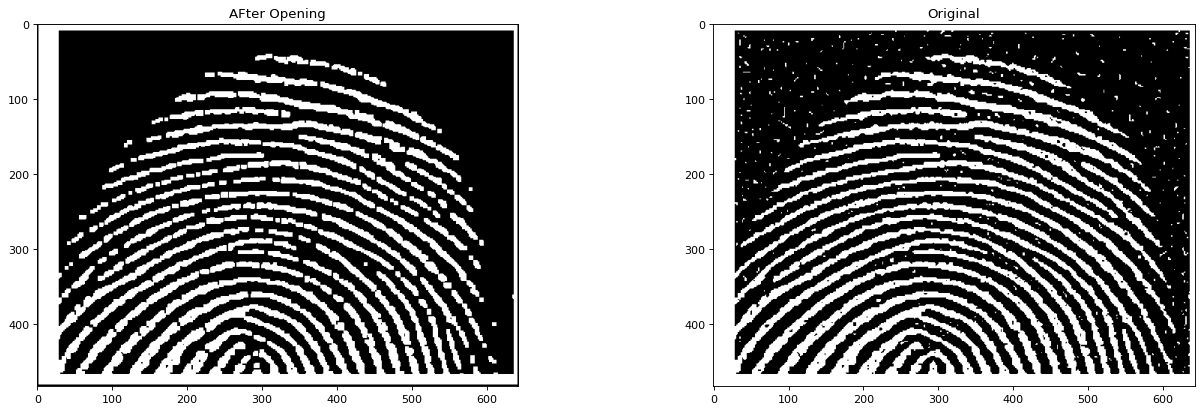

In [29]:
fig, ax = setupPlots(2)
kernel = np.ones((5,5))*255
prueba1 = Dilatation(kernel, Erosion(kernel, imgs[1])) # opening
ax[0].imshow(prueba1, cmap='gray')
ax[0].set_title('AFter Opening')
ax[1].imshow(imgs[1], cmap='gray')
ax[1].set_title('Original')
plt.show()

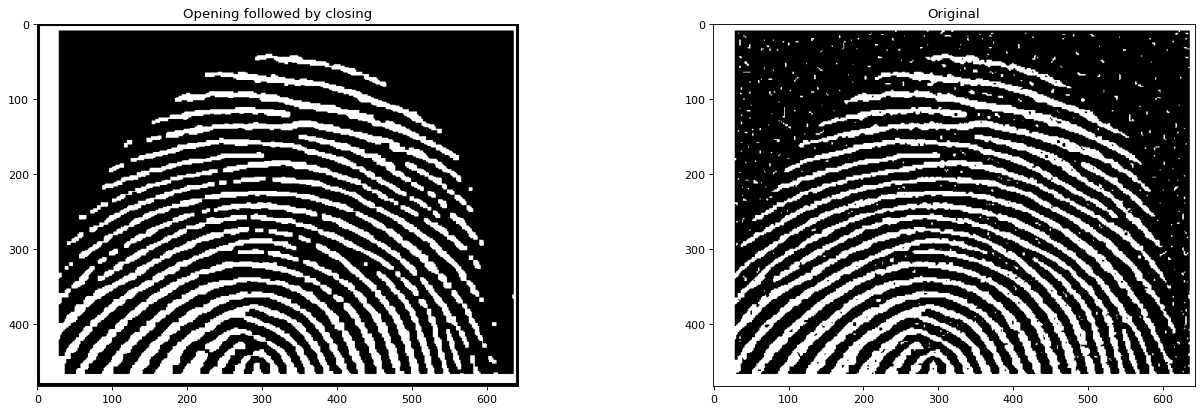

In [30]:
fig, ax = setupPlots(2)
kernel = np.ones((5,5))*255
prueba1 = Erosion(kernel, Dilatation(kernel, Dilatation(kernel, Erosion(kernel, imgs[1])))) # opening followed by closing
ax[0].imshow(prueba1, cmap='gray')
ax[0].set_title('Opening followed by closing')
ax[1].imshow(imgs[1], cmap='gray')
ax[1].set_title('Original')
plt.show()

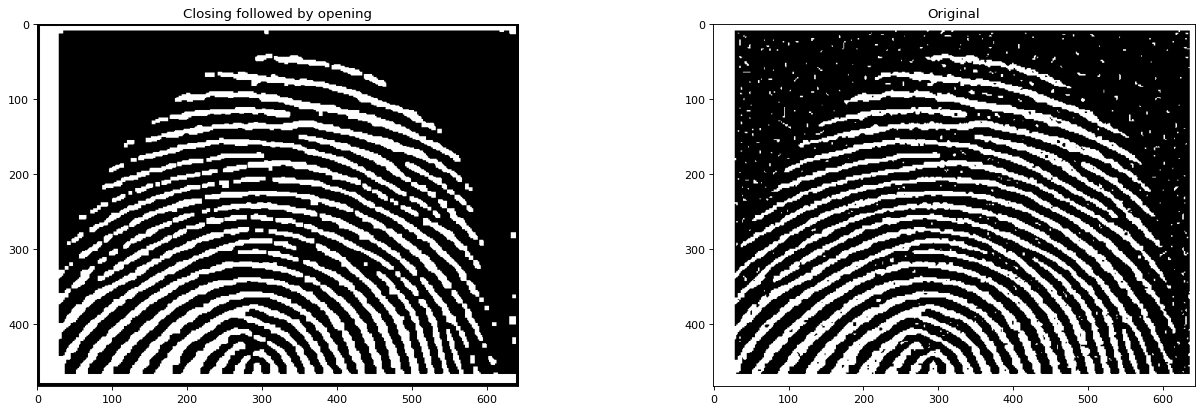

In [31]:
fig, ax = setupPlots(2)
kernel = np.ones((5,5))*255
prueba1 = Dilatation(kernel, Erosion(kernel, Erosion(kernel, Dilatation(kernel, imgs[1])))) # opening followed by closing
ax[0].imshow(prueba1, cmap='gray')
ax[0].set_title('Closing followed by opening')
ax[1].imshow(imgs[1], cmap='gray')
ax[1].set_title('Original')
plt.show()

### Conclusions

The first image only needed a thresholding to improve its resolution. The second image needed a Opening Followed by Closing to remove the background noise while mantaining the width of the traces